# Endsem

In [1]:
import MyLibrary as ml
import numpy as np
import matplotlib.pyplot as plt
import math

# 7

X= [-2.0, -1.84, -1.68, -1.52, -1.36, -1.2, -1.04, -0.88, -0.72, -0.56, -0.4, -0.24, -0.08, 0.08, 0.24, 0.4, 0.56, 0.72, 0.88, 1.04, 1.2, 1.36, 1.52, 1.68, 1.84, 2.0]
Y= [7.42, 6.328, 4.357, 3.885, 3.488, 2.644, 1.63, 1.526, 1.209, 0.758, 0.902, 0.57, 0.193, 0.2, -0.428, -0.311, -0.467, -1.0, -1.676, -2.065, -3.201, -4.801, -5.382, -6.461, -8.355, -10.18]


Text(0, 0.5, 'Y')

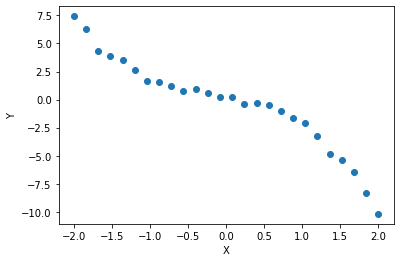

In [7]:
#for reading data from file 
data= [i.strip().split() for i in open("esem4fit.txt").readlines()]
x,y=[],[]
for i in range(len(data)):
    x.append(float(data[i][0]))
    y.append(float(data[i][1]))
print('X=',x)
print('Y=',y)
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')

solution [0.2546295072115473, -1.193759213809225, -0.45725541238296735, -0.8025653910658195, 0.013239427477396109]
The fit parameters are, 0.013239427477396109 x^4 -0.8025653910658195 x^3 -0.45725541238296735 x^2 -1.193759213809225 x+ 0.2546295072115473


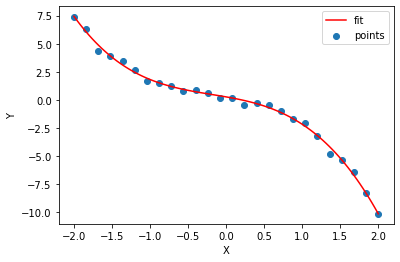

In [8]:
def pol(a,b,c,d,e,x):
    return a*x**4+b*x**3+c*x**2+d*x+e

# solving to get coefficients
M=ml.polycoeff(x,y,4)
mat=ml.cholesky(M[0]) #M[0] is X, M[1] is Y
mat1=ml.transpose(mat)
sol=ml.chol_bsub(mat1,ml.chol_fsub(mat,M[1]))
print('solution',sol) #sol=bsub(mat1,coeff)
print('The fit parameters are,', sol[4],'x^4',sol[3],'x^3',sol[2],'x^2',sol[1],'x+',sol[0])

#To plot function
h,v=np.linspace(-2,2,100),[]
for i in range(len(h)):
    #h.append(i)
    j=pol(sol[4],sol[3],sol[2],sol[1],sol[0],h[i])
    v.append(j)
import matplotlib.pyplot as plt
plt.plot(h,v,'r',label='fit')
plt.scatter(x,y,label='points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 6

In [17]:
with open('esem_inputs.txt') as f:
    a,b,c,d=[],[],[],[]
    list3=[a,b,c,d]
    j=0
    for line in f:
        line=line.strip().split() # split when there is an empty line
        if len(line)!=0:
            list3[j].append(line)
        else:
            j+=1

    for i in range(len(list3)): # converting the list elements to matrix before & after the empty space
        for j in range(len(list3[i])):
            for k in range(len(list3[i][j])):
                list3[i][j][k]=float(list3[i][j][k])
        
print(a) # a is the matrix
print(b) # b and c are guess matrices
print(c)

[[1.0, -2.0, 0.0, 5.0], [0.0, 7.0, 1.0, 5.0], [0.0, 4.0, 4.0, 0.0], [0.0, 0.0, 0.0, 2.0]]
[[1.0], [2.0], [3.0]]
[[1.0], [2.0], [3.0]]


In [18]:
eigval,itr,eigvec=ml.eigen(a,b,c,0.001)  # b and c are guess
print('eigenvalue=',eigval)
print('iterations=',itr)
print('Normalised eigenvector=',eigvec)

eigenvalue= 8.0
iterations= 8
Normalised eigenvector= [[-0.198], [0.693], [0.693], [0.0]]


# 3

In [19]:
def f(x):
    return 2.5-x*math.exp(x)

def fd(x):
    return -math.exp(x)-x*math.exp(x)

In [20]:
a,b,itr=ml.newraph(f,fd,1,0.001,0.001) # a,b are roots, itr= iterations
print('The spring gets stretched by', round(a,3))

The spring gets stretched by 0.959


# 4

In [13]:
L=1
g=9.8
tm=math.pi/4
a=math.sin(tm/2)
lowlim=0
highlim=tm

# after solving the parameter we obtained this function, with the limits
def f(x):
    return 4*math.sqrt(L/g)*(1/(2*a)) * (math.cos(x/2)/(math.sqrt(1-(math.sin(x/2)/a)**2)*math.sqrt(1-(math.sin(x/2))**2)))
ml.simpson(f,lowlim,highlim,10)

ZeroDivisionError: float division by zero

# 5

maximum height is 4.99999999999999


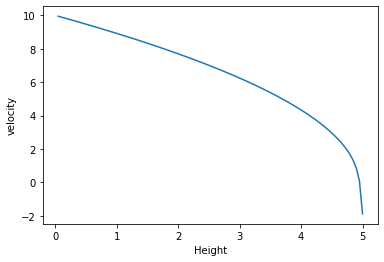

In [6]:
r=0.02
g=10
def dvdt(x,v):
    return (-r-g/v)

y,X,Y=ml.rk4(dvdt,0,10,5,0.05)
plt.plot(X,Y)
plt.xlabel('Height')
plt.ylabel('velocity')

maxval=X[0]
for i in range(len(X)):
    if X[i]>maxval:
        maxval=X[i]

print('maximum height is',maxval)

# 2

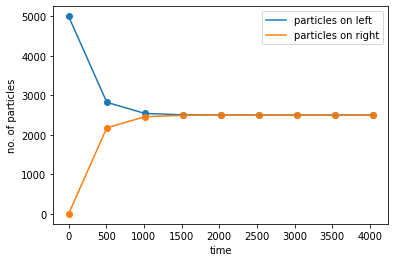

In [10]:
X,Y,time=ml.particles( 0, 4000, 5000, 5000, 0, 0.1)
plt.plot(time,Y, label='particles on left')
plt.scatter(time,Y)
plt.plot(time,X, label='particles on right')
plt.scatter(time,X)
plt.xlabel('time')
plt.ylabel('no. of particles')
plt.legend()